## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv(r'C:\Users\remya\Downloads\DAND\ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [6]:
df.query('converted == 1').shape[0] # 35237
# total unique users = 290584
#proportion
35237 / 290584
# ~ 12%

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df_page_group = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
df_page_group.shape[0]

3893

In [8]:
df_page_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 22 to 294331
Data columns (total 5 columns):
user_id         3893 non-null int64
timestamp       3893 non-null object
group           3893 non-null object
landing_page    3893 non-null object
converted       3893 non-null int64
dtypes: int64(2), object(3)
memory usage: 182.5+ KB


f. Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.drop(df_page_group.index, axis=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df_temp = df2.groupby(['user_id']).size().reset_index(name='count')
df_temp.query('count > 1')

,user_id,count
131712,773192,2


c. What is the row information for the repeat **user_id**? 

In [14]:
print (df2.query('user_id ==  773192'))

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates('user_id', keep='first', inplace=True)
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [16]:
df_temp = df2.groupby('user_id').size().reset_index(name='count')
df_temp.query('count > 1')

,user_id,count


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
(df2.converted == 1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df_control = df2.query('group == "control"')
df_control.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df_treatment = df2.query('group == "treatment"')
df_treatment.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df_new_page = df2.query('landing_page == "new_page"')

In [21]:
df2.info()
# no of users 290584
df_new_page.info()
#no. of users who saw the new page 145310
#proportion
145310 / 290584

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145310 entries, 2 to 294477
Data columns (total 5 columns):
user_id         145310 non-null int64
timestamp       145310 non-null object
group           145310 non-null object
landing_page    145310 non-null object
converted       145310 non-null int64
dtypes: int64(2), object(3)
memory usage: 6.7+ MB


0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**> From the values above it is hard to say if the new page is doing better than the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis : **$p_{old}$** $\geq$ **$p_{new}$**
Alternative Hypothesis : **$p_{new}$** $\gt$ **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

**> Earlier we calculated conversion irrespective of the page as 0.1196
Under the null hypothesis since P(new) == P(old) = 0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# same as P(new)
0.1196

0.1196

c. What is $n_{new}$?

In [23]:
(df2.query( 'landing_page == "new_page"').shape[0])

145310

d. What is $n_{old}$?

In [24]:
#get no. of rows
(df2.query( 'landing_page == "old_page"').shape[0])

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(1, .1196 ,size = 145310)

In [26]:
p_new = np.mean(new_page_converted)
p_new

0.11948936755901177

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, .1196, size = 145274)
p_old= np.mean(old_page_converted)
p_old

0.12066164626843069

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_new - p_old

-0.0011722787094189252

In [29]:
def get_p_diff():
    new_page_convert = np.random.binomial(1, .1196 ,size = 145310)
    old_page_convert = np.random.binomial(1, .1196 ,size = 145274)
    return (np.mean(new_page_convert) - np.mean(old_page_convert))

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
p_diffs = []
for i in range(0,10000):
    p_diffs.append(get_p_diff())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   7.,   99.,  598., 1834., 3104., 2674., 1288.,  339.,   52.,
           5.]),
 array([-0.0046067 , -0.00364655, -0.00268639, -0.00172624, -0.00076609,
         0.00019407,  0.00115422,  0.00211438,  0.00307453,  0.00403468,
         0.00499484]),
 <a list of 10 Patch objects>)

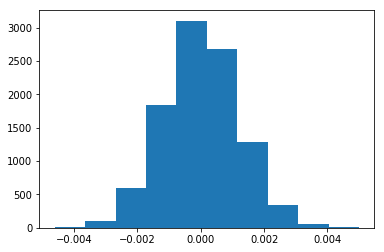

In [63]:
plt.hist(p_diffs)
# low, upper = np.percentile(p_diffs,2.5) , np.percentile(p_diffs , 97.5)
# plt.axvline(x = low , color = 'r' , linewidth = 2)
# plt.axvline(x = upper , color = 'r' , linewidth = 2)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
df_old_page = df2.query('landing_page == "old_page"')
(df_old_page.converted == 1).sum()

17489

In [33]:
df_new_page = df2.query('landing_page == "new_page"')
(df_new_page.converted == 1).sum()

17264

In [34]:
df2.nunique()
# proportion of users converted with old page
p_old_df2 = 17489 / 290584

In [35]:
# proportion of users converted with new page
p_new_df2 = 17264 / 290584

In [60]:
# actual difference observed in conversion between new and old page
obs_diff = p_new_df2 - p_old_df2
obs_diff

-0.0007743027833604019

In [37]:
x = np.array(p_diffs)
(x > -0.0007743027833604019 ).mean()

0.7492

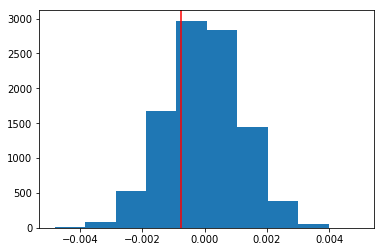

In [61]:
null_vals = np.random.normal(0,x.std(),x.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [62]:
(null_vals > obs_diff).mean()

0.738

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-value - Since it is the conditional probability of the data given that the null hypothesis is true. Large p-value suggests that we stay close to our null hypothesis which in our case the assumption that the old page is better than or equal to the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

In [39]:
cond1 = df2["converted"] == 1  
cond2 = df2["landing_page"] == 'old_page'

df_converted_old = df2[cond1 & cond2]

In [40]:
cond3 = df2["converted"] == 1  
cond4 = df2["landing_page"] == 'new_page'

df_converted_new = df2[cond3 & cond4]

In [41]:
convert_old = df_converted_old['user_id'].count()
convert_old

17489

In [42]:
convert_new = df_converted_new['user_id'].count()
convert_new

17264

In [43]:
n_old = df2[cond2]['user_id'].count()
n_old

145274

In [44]:
n_new = df2[cond4]['user_id'].count()
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [45]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new ], [n_old, n_new])
z_score

1.3109241984234394

In [46]:
p_value

0.18988337448195103

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value is very different between the 2 ways it was calculated. But both are above 0.05. Therefore we cannot reject the null hypothesis, as the evidence against null hpothesis is weak**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**Logistic regression, since there are only 2 possible outcomes**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df2['intercept'] = 1

In [64]:
df2['ab_page'] = pd.get_dummies(df2['group'], drop_first=True)
df2['ab_page'] 

0         0
1         0
2         1
3         1
4         0
5         0
6         1
7         0
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        0
16        0
17        1
18        0
19        0
20        1
21        1
23        1
24        1
25        0
26        1
27        1
28        0
29        1
30        0
         ..
294448    1
294449    1
294450    1
294451    0
294452    0
294453    0
294454    1
294455    1
294456    1
294457    1
294458    1
294459    0
294460    1
294461    0
294462    1
294463    0
294464    0
294465    1
294466    0
294467    0
294468    1
294469    0
294470    0
294471    0
294472    1
294473    0
294474    0
294475    0
294476    0
294477    1
Name: ab_page, Length: 290584, dtype: uint8

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [66]:
lm = sm.OLS(df2['ab_page'], df2[['intercept','converted']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ab_page   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Thu, 04 Apr 2019   Prob (F-statistic):              0.190
Time:                        22:23:46   Log-Likelihood:            -2.1090e+05
No. Observations:              290584   AIC:                         4.218e+05
Df Residuals:                  290582   BIC:                         4.218e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5005      0.001    506.313      0.000       0.499       0.502
converted     -0.0037      0.003     -1.311      0.190      -0.009       0.002
==============================================================================
Omnibus:                        0.003   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.999   Jarque-Bera (JB):            48429.521
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                         3.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

#### Predicted individual conversion has a strong relation to the ab_page or the page that was received as indicated by the p-value of 0.190. Therefore ab_page is a good explanatory variable to predict response variable 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value is 0.190. This is different because by default software calculations consider alternative hypothesis to be not equal. Where as when we defined it in part II, it was defined as P(new) > P(old) **

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**From the R-squared value we can see that the model does not fit as the value is close to zero. Correlation is not large enough**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
countries_df = pd.read_csv(r'C:\Users\remya\Downloads\DAND\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [51]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [52]:
### Create the necessary dummy variables
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'], drop_first=True)
df_new = df_new.drop(columns=['country'])
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [53]:
df_new['intercept'] = 1
lm = sm.OLS(df_new['US'], df_new[['intercept','converted']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     US   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9121
Date:                Thu, 04 Apr 2019   Prob (F-statistic):              0.340
Time:                        10:20:43   Log-Likelihood:            -1.6886e+05
No. Observations:              290584   AIC:                         3.377e+05
Df Residuals:                  290582   BIC:                         3.378e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2491      0.001    291.209      0.000       0.247       0.251
converted      0.0024      0.002      0.955      0.340      -0.002       0.007
==============================================================================
Omnibus:                    55157.746   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70240.945
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       2.342   Cond. No.                         3.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
lm = sm.OLS(df_new['UK'], df_new[['intercept','converted']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UK   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01634
Date:                Thu, 04 Apr 2019   Prob (F-statistic):              0.898
Time:                        10:20:44   Log-Likelihood:            -1.8537e+05
No. Observations:              290584   AIC:                         3.707e+05
Df Residuals:                  290582   BIC:                         3.708e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7008      0.001    773.993      0.000       0.699       0.703
converted     -0.0003      0.003     -0.128      0.898      -0.005       0.005
==============================================================================
Omnibus:                   384481.846   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55581.107
Skew:                          -0.877   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                         3.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**p-value for US 0.34 , p-value for UK 0.898. Both being higher than alpha they still indicate the null hypothesis to be true**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
df_new['landing'] = pd.get_dummies(df_new['landing_page'], drop_first=True)

In [56]:
### Fit Your Linear Model And Obtain the Results
lm = sm.OLS(df_new['converted'], df_new[['intercept','ab_page','US', 'UK', 'landing']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Thu, 04 Apr 2019   Prob (F-statistic):              0.178
Time:                        10:20:44   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0769      0.002     42.794      0.000       0.073       0.080
ab_page        0.0377      0.001     34.848      0.000       0.036       0.040
US             0.0053      0.003      1.784      0.074      -0.001       0.011
UK             0.0042      0.003      1.514      0.130      -0.001       0.010
landing        0.0392      0.001     36.251      0.000       0.037       0.041
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                     7.37e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**In the multi-variable analysis only the country factor has p-value higher than alpha. So does that mean only those influenced the conversion rate? I am not sure. Also I thin this model does not fit and thus not suitable for this problem. I think Logistic regression model need to be tried here. Overall, I am confused by the 0.0 value for r-squared and still p-value > alpha. If the r-squared was anything but zero or even really close to zero, I could assume it might be due to the size of r. But exactly zero indicates it cannt really explain the variability around the response data from the avaialable expalanatory variables.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [57]:
### References
# http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm